Saving timeseries.csv to timeseries (2).csv
Headings:
Index(['Date', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')

First two rows:
         Date      A       B       C      D      E      F      G
0  2008-03-18  24.68  164.93  114.73  26.27  19.21  28.87  63.44
1  2008-03-19  24.18  164.89  114.75  26.22  19.07  27.76  59.98

Column Names:
['Date', 'A', 'B', 'C', 'D', 'E', 'F', 'G']


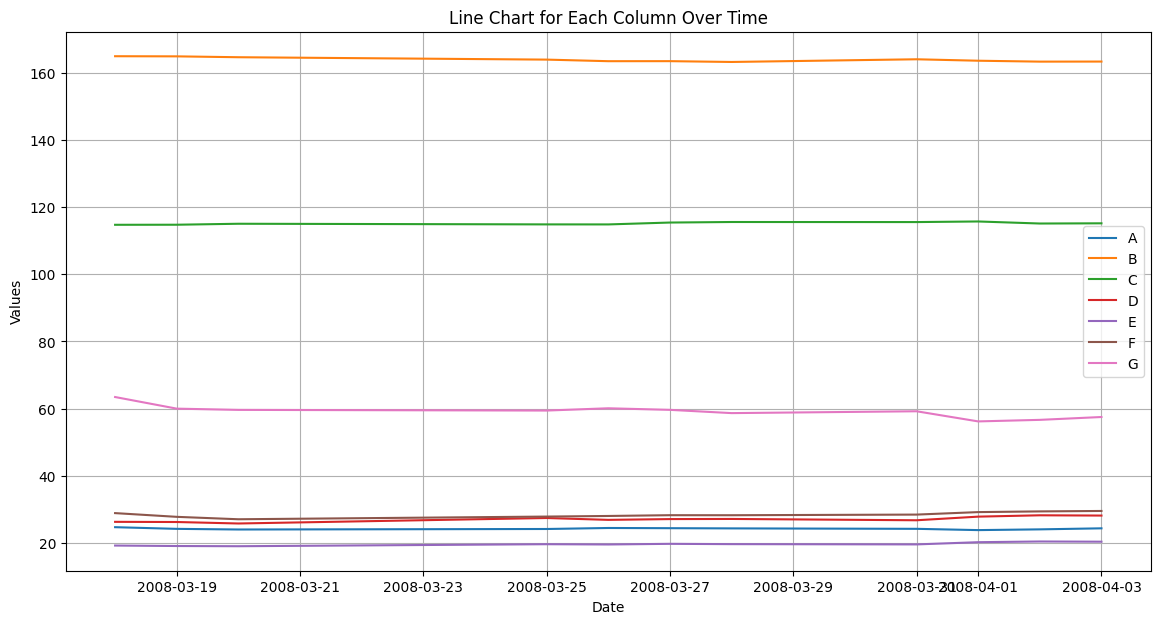

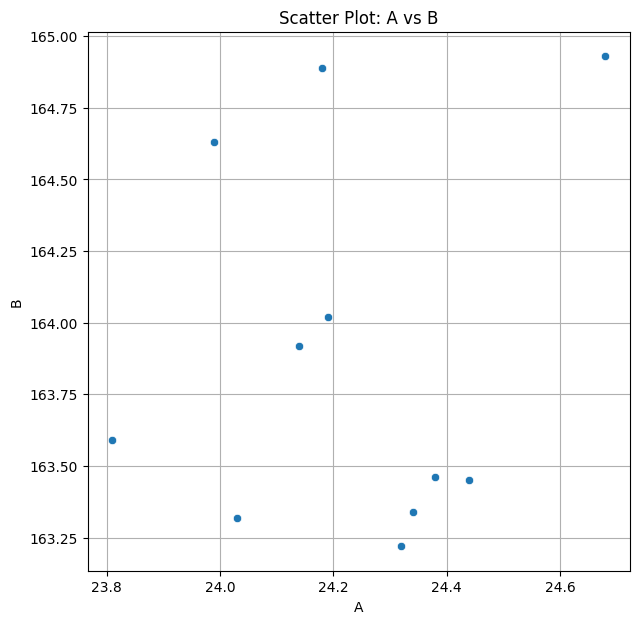

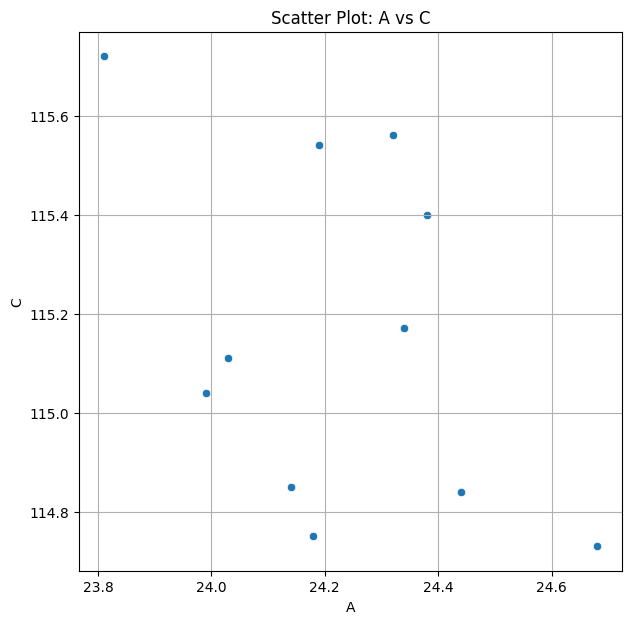

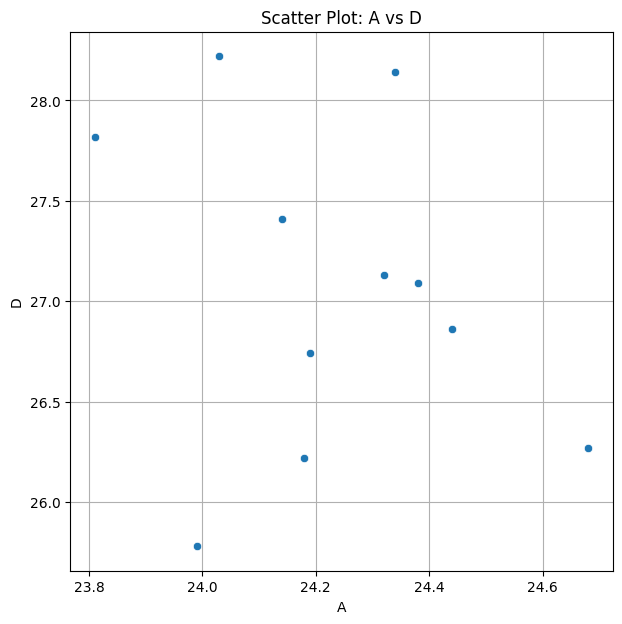

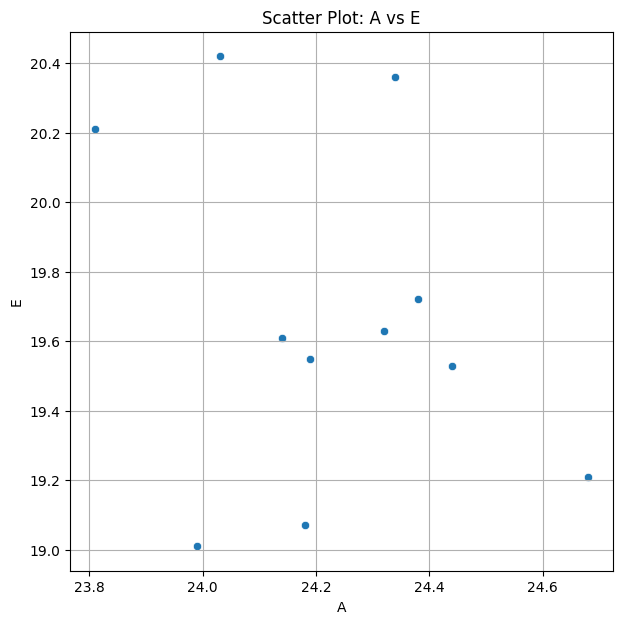

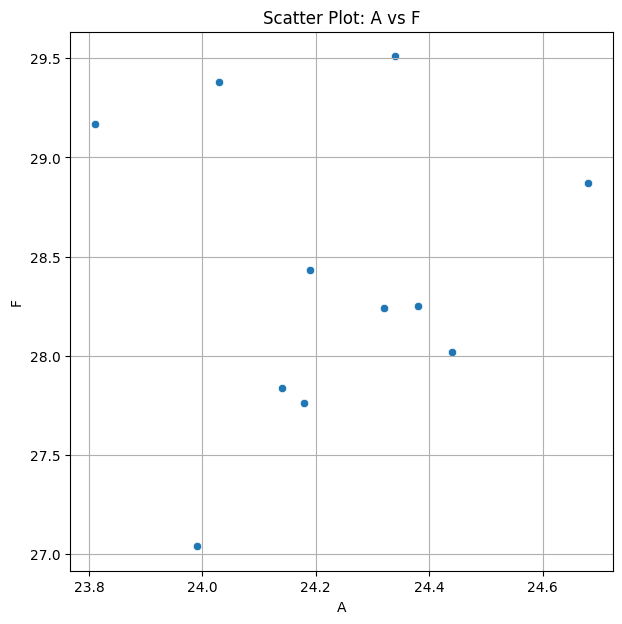

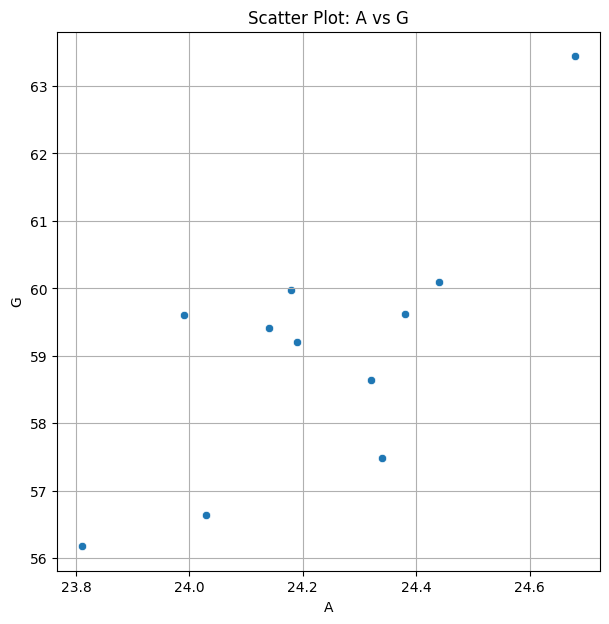

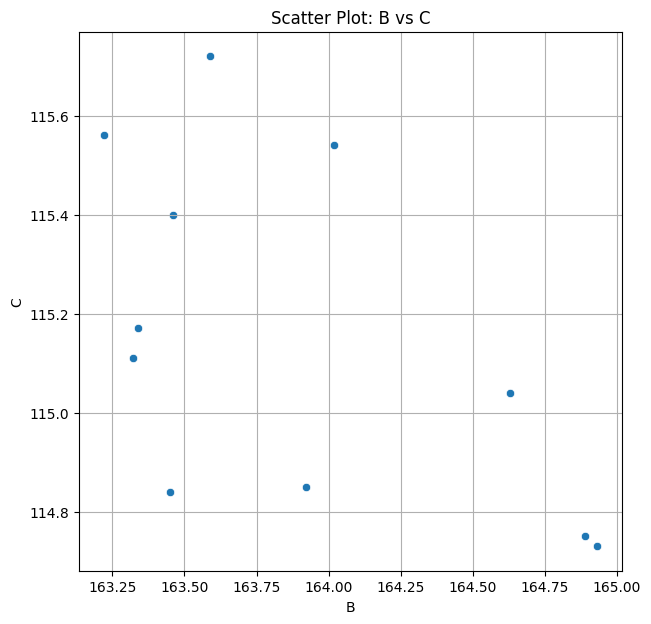

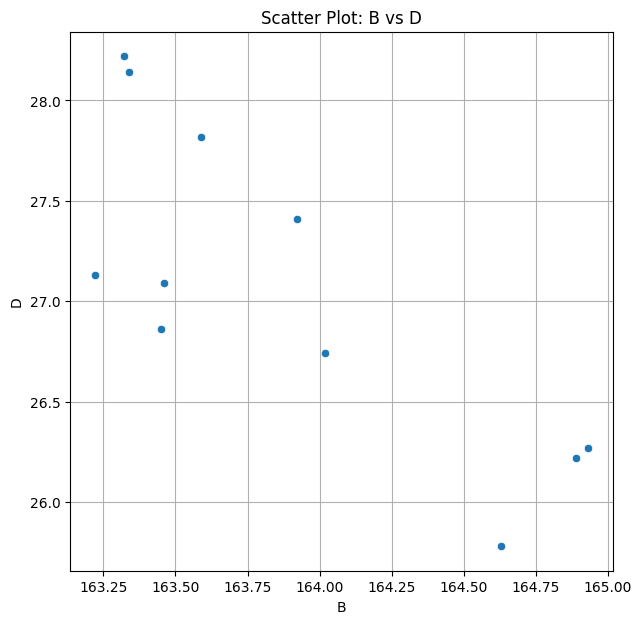

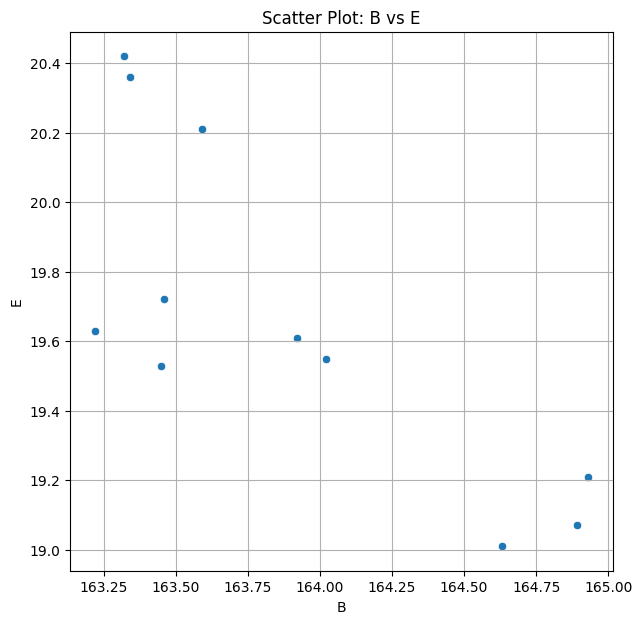

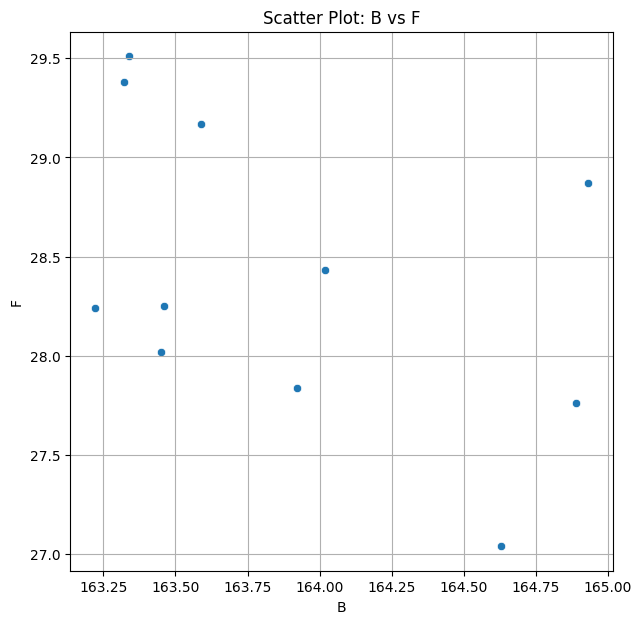

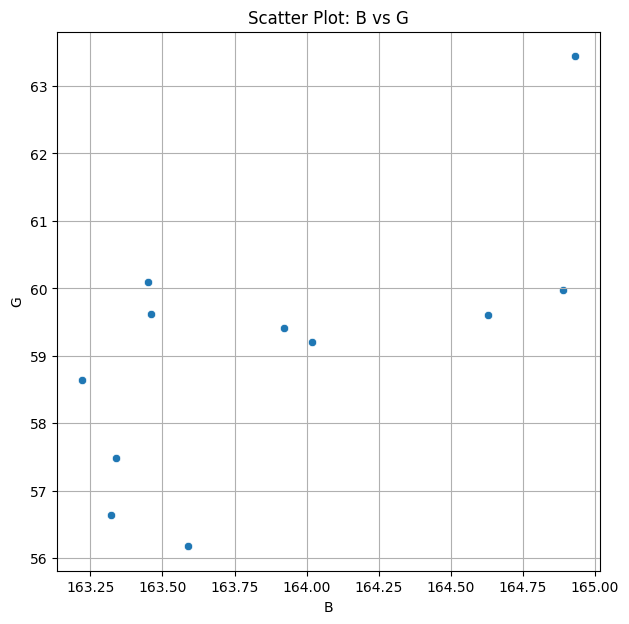

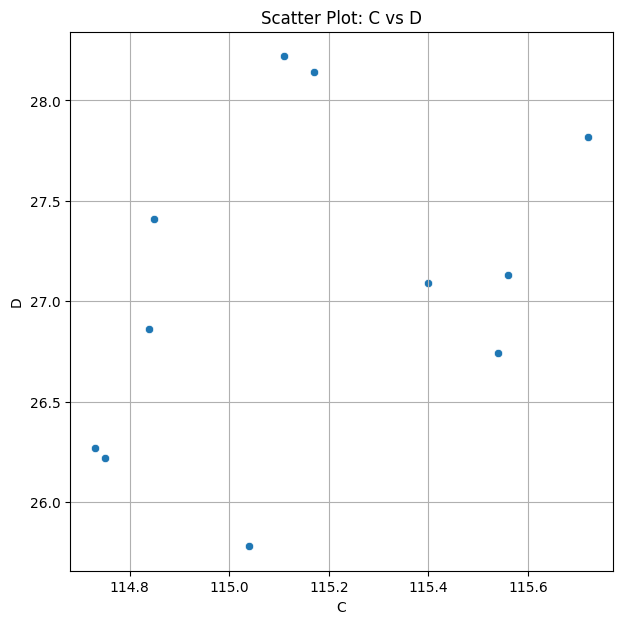

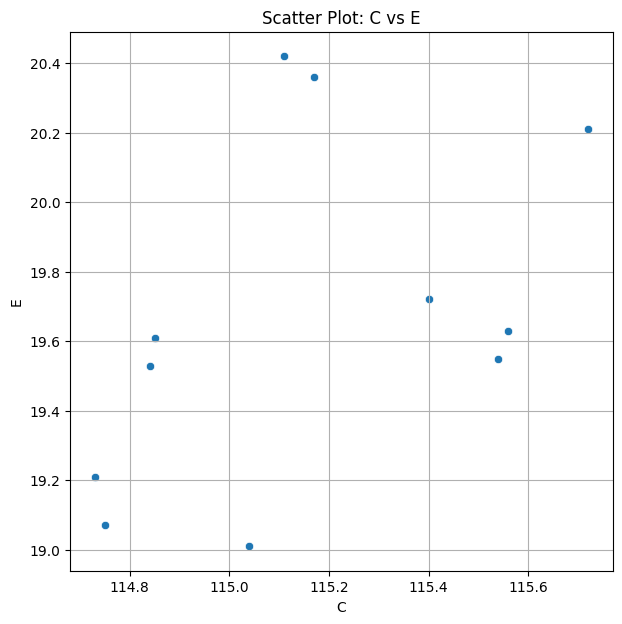

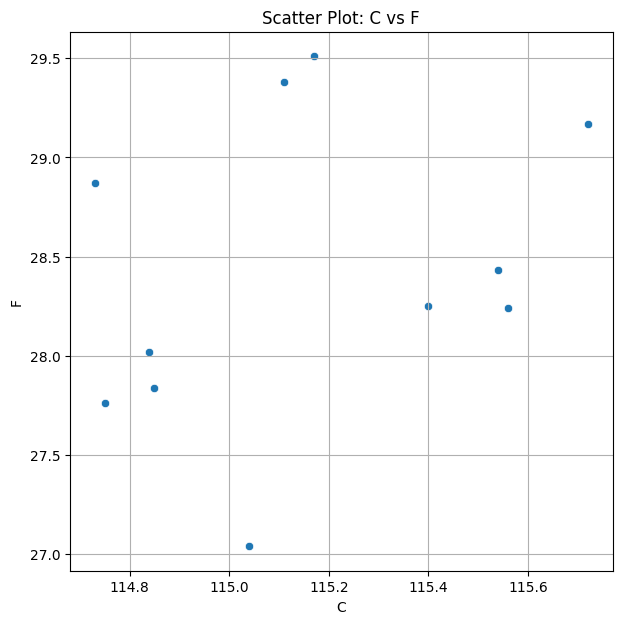

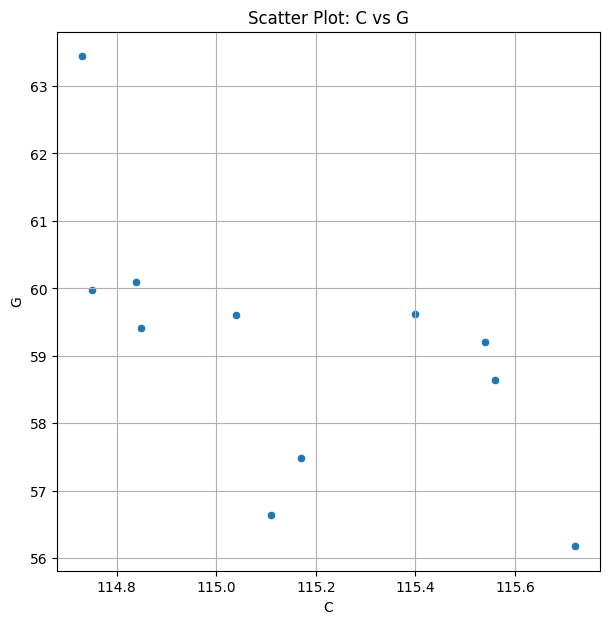

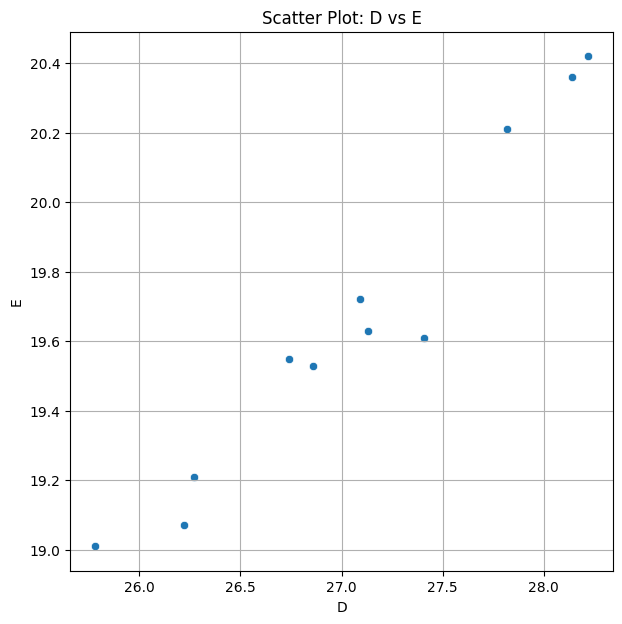

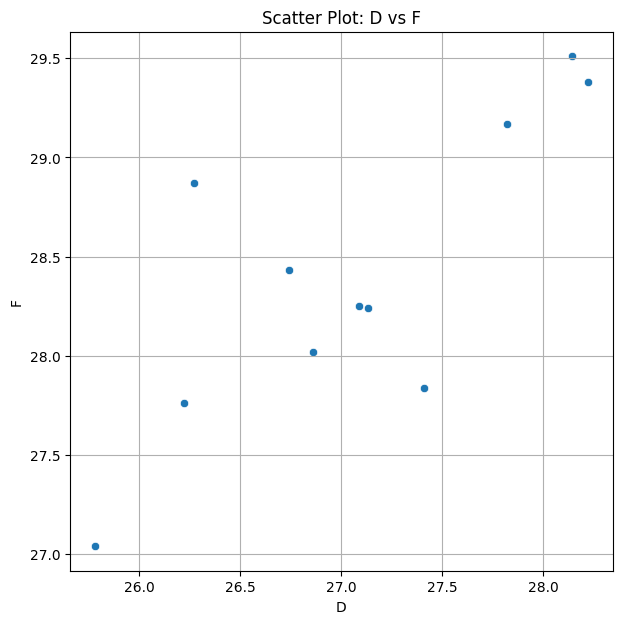

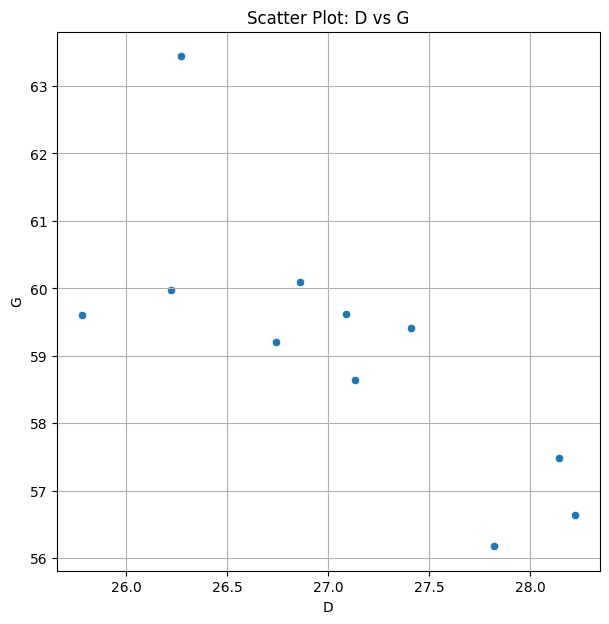

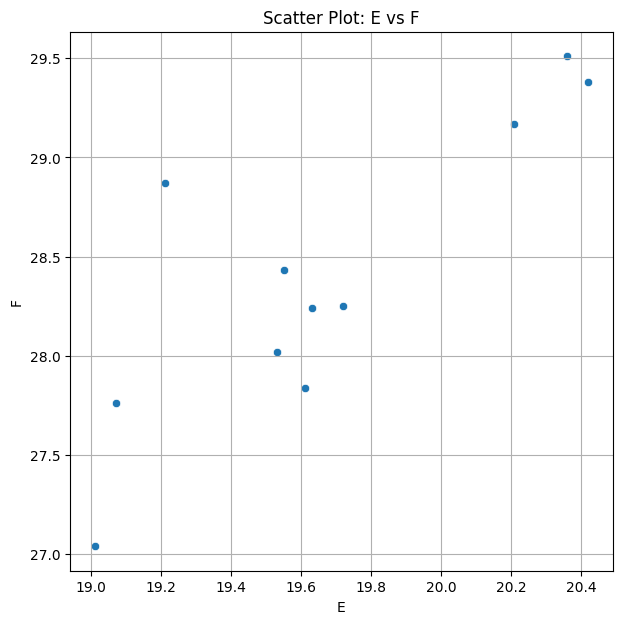

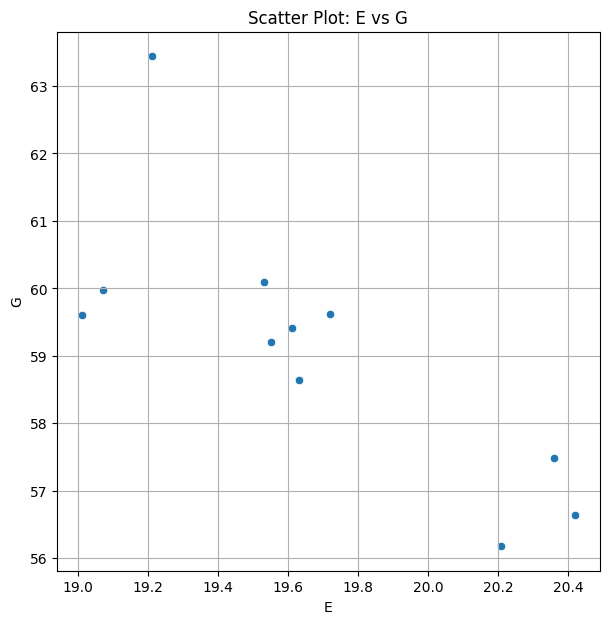

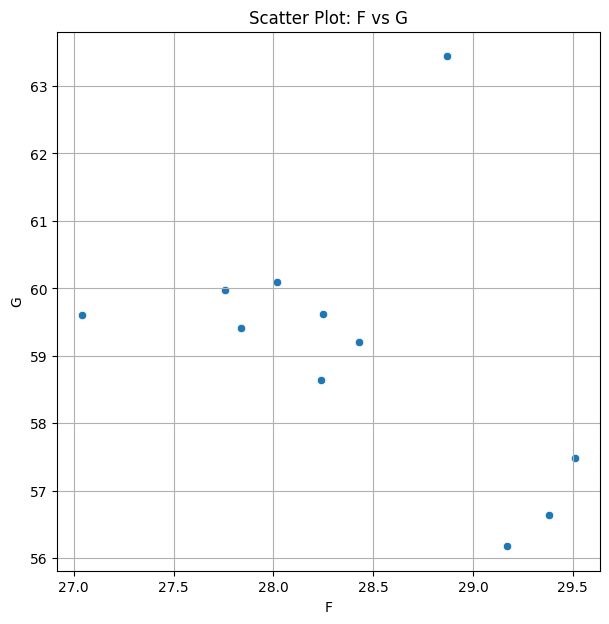

In [4]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Save the uploaded file as a DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 3: Print the headings and the first two rows
print("Headings:")
print(df.columns)
print("\nFirst two rows:")
print(df.head(2))

# Step 4: Store the column names as a list
column_names = df.columns.tolist()
print("\nColumn Names:")
print(column_names)

# Step 5: Convert date columns to datetime format if necessary
date_column_name = 'Date'
if date_column_name in df.columns:
    df[date_column_name] = pd.to_datetime(df[date_column_name])

# Step 6: Convert the entire DataFrame to a NumPy array
numpy_array = df.to_numpy()

# Step 7: Create a line chart with date as x-axis and all other columns as y-axis
plt.figure(figsize=(14, 7))
for col in df.columns:
    if col != date_column_name:
        plt.plot(df[date_column_name], df[col], label=col)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Line Chart for Each Column Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Create scatter plots comparing each column (excluding the date column) with one another
numeric_columns = [col for col in df.columns if col != date_column_name]

# Generate all possible combinations of column pairs
column_pairs = list(combinations(numeric_columns, 2))

# Create scatter plots for each pair of columns
for col1, col2 in column_pairs:
    plt.figure(figsize=(7, 7))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.grid(True)
    plt.show()
